<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_11_Pandas Explode.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda job: ast.literal_eval(job) if pd.notna(job) else job)

## 🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1)

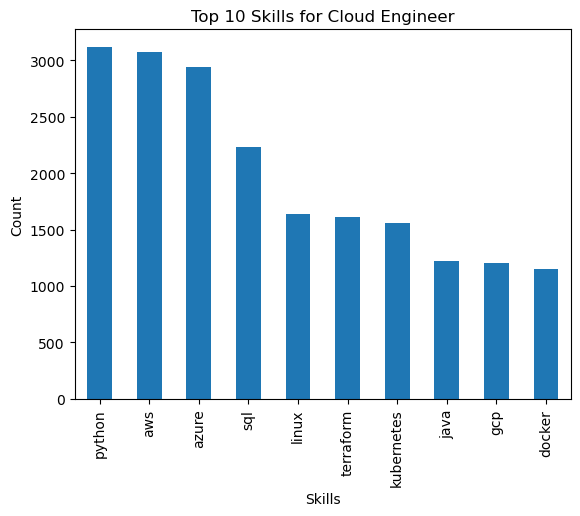

In [8]:
df_exploded = df.explode('job_skills').copy()
job_title = 'Cloud Engineer' # Change this to get skills for different job titles
df_filtered = df_exploded[df_exploded['job_title_short'] == job_title]
df_filtered = df_filtered['job_skills'].value_counts().head(10)
df_filtered.plot(kind='bar')
plt.title(f'Top 10 Skills for {job_title}')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

---

## 🟨 Average Salary by Skill (2.11.2)

In [3]:
df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index().sort_values(by='salary_year_avg', ascending=False).head(5)

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


---

## 🟥 Unique Skills Count (2.11.3)

In [11]:
df_grouped = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
df_grouped.columns = ['job_title_short', 'num_unique_skills']
df_grouped.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


---